<a href="https://colab.research.google.com/github/hramesh1212/python/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd 
df=pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df["latitude"]

0        34.19
1        34.40
2        33.69
3        33.64
4        33.57
         ...  
16995    40.58
16996    40.69
16997    41.84
16998    41.80
16999    40.54
Name: latitude, Length: 17000, dtype: float64

In [ ]:
df[['households','median_house_value']]
import seaborn as sns

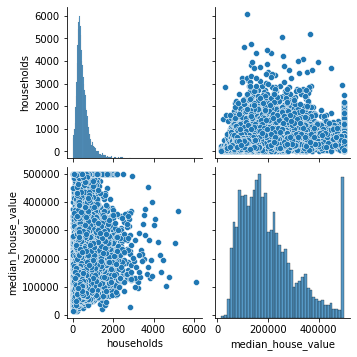

In [ ]:
sns.pairplot(df[['households','median_house_value']],palette='coolwarm')
import matplotlib.pyplot as plt
plt.show()

In [ ]:
dff=df[['households','median_house_value','housing_median_age']]
from sklearn.model_selection import train_test_split
X=dff[['households','median_house_value']].values
y=dff["housing_median_age"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model = Sequential()



model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')


In [ ]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
399/399 [==============================] - 2s 5ms/step - loss: 232.3857
Epoch 2/250
399/399 [==============================] - 1s 3ms/step - loss: 225.8469
Epoch 3/250
399/399 [==============================] - 1s 3ms/step - loss: 219.6753
Epoch 4/250
399/399 [==============================] - 1s 3ms/step - loss: 213.8697
Epoch 5/250
399/399 [==============================] - 1s 3ms/step - loss: 208.2381
Epoch 6/250
399/399 [==============================] - 1s 3ms/step - loss: 203.0056
Epoch 7/250
399/399 [==============================] - 1s 3ms/step - loss: 198.1249
Epoch 8/250
399/399 [==============================] - 1s 3ms/step - loss: 193.5394
Epoch 9/250
399/399 [==============================] - 1s 3ms/step - loss: 189.1908
Epoch 10/250
399/399 [==============================] - 2s 4ms/step - loss: 185.2328
Epoch 11/250
399/399 [==============================] - 2s 4ms/step - loss: 181.5216
Epoch 12/250
399/399 [==============================] - 1s 3ms/step - loss

In [ ]:
Loss=pd.DataFrame(model.history.history)
Loss.tail(5)

,loss
45,269.613220
46,261.509186
47,253.793976
48,246.316940
49,239.199249


In [ ]:
print(model.evaluate(x=X_test,y=y_test,verbose=0))
model.evaluate(x=X_train,y=y_train,verbose=0)

239.16087341308594


235.72776794433594

In [ ]:
predictions=model.predict(X_test)
predictions

133/133 [==============================] - 0s 2ms/step


array([[19.748293],
       [19.748293],
       [19.748293],
       ...,
       [19.748293],
       [19.748293],
       [19.748293]], dtype=float32)

In [ ]:
import pandas as pd
Pred=pd.Series(predictions.reshape(4250,))
Comp=pd.DataFrame({"y_test":y_test,"pred":Pred})
print(Comp.head())

   y_test       pred
0     NaN  19.748293
1     NaN  19.748293
2    17.0  19.748293
3     NaN  19.748293
4     NaN  19.748293


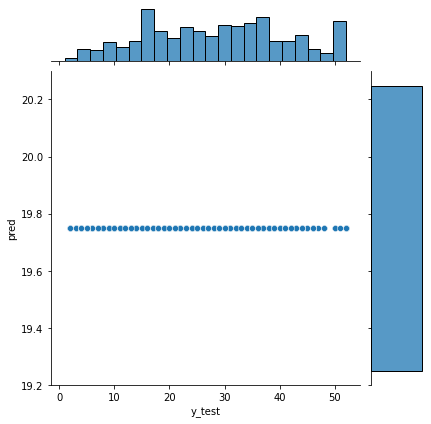

In [ ]:
sns.jointplot(x="y_test",y="pred",data=Comp)

In [ ]:
y_test.isnull().sum()

0

In [ ]:
len(list(predictions))

4250